In [1]:
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if (!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, httr,jsonlite, srvyr)

Loading required package: pacman



### Turistas en CDMX

In [2]:
url_tur<-"https://datos.cdmx.gob.mx/dataset/f4bcda9f-803b-4a64-bee1-79fbf02446e3/resource/ce6bc859-5e50-44e4-82b8-990fa97a0dac/download/turistas_desglosado_2024_7.csv"

In [3]:
turistas<-read_csv(url_tur,show_col_types = FALSE)%>%
#Agrupar por año
group_by(anio)%>%
#Sumar turistas
summarise(turistas=sum(turistas))%>%
#Crear índice base 2018=100
mutate(turistas_index=turistas/turistas[anio==2018]*100)%>%
filter(anio<=2019)%>%
#Calcular tasa de crecimiento de turistas index
mutate(tasa_crecimiento=(turistas_index-lag(turistas_index))/lag(turistas_index)*100)%>%na.omit()
turistas

anio,turistas,turistas_index,tasa_crecimiento
<dbl>,<dbl>,<dbl>,<dbl>
1999,8893087,63.60288,12.7029977
2000,9123995,65.25432,2.5964887
2001,10451936,74.75168,14.5543811
2002,10170832,72.74124,-2.6894922
2003,10438037,74.65227,2.6271695
2004,11615335,83.07225,11.2789215
2005,12212665,87.34432,5.1425981
2006,11149161,79.73819,-8.7082058
2007,11057203,79.08052,-0.8247975


In [4]:
#Hacer regresión lineal de indice de turistas
modelo<-lm(turistas_index~anio,data=turistas)
modelo%>%summary()


Call:
lm(formula = turistas_index ~ anio, data = turistas)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6766  -0.8273   0.3836   1.4069   9.8929 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3183.2457   338.6029  -9.401 1.41e-08 ***
anio            1.6263     0.1685   9.649 9.33e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.677 on 19 degrees of freedom
Multiple R-squared:  0.8305,	Adjusted R-squared:  0.8216 
F-statistic: 93.11 on 1 and 19 DF,  p-value: 9.327e-09


`geom_smooth()` using formula = 'y ~ x'


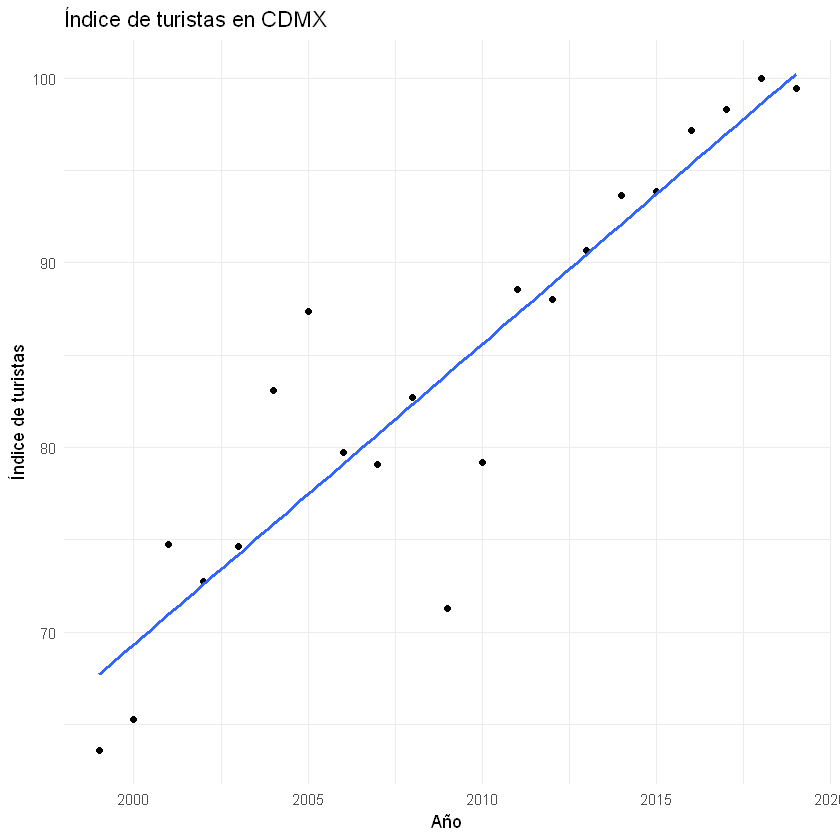

In [5]:
#Graficar
turistas%>%
ggplot(aes(x=anio, y=turistas_index))+
geom_point()+
geom_smooth(method="lm",se=FALSE)+
labs(title="Índice de turistas en CDMX",x="Año",y="Índice de turistas")+
theme_minimal()+
theme(legend.position = "none")


In [6]:
#Hacer predicción de índice de turistas para 2025 a 2045
prediccion<-data.frame(anio=2020:2045)
prediccion$turistas_index<-predict(modelo,newdata=prediccion)
#Tasa de crecimiento del índice de turistas
prediccion$tasa_crecimiento<-diff(prediccion$turistas_index)/prediccion$turistas_index*100
prediccion

Warning message in diff(prediccion$turistas_index)/prediccion$turistas_index:
"longer object length is not a multiple of shorter object length"


anio,turistas_index,tasa_crecimiento
<int>,<dbl>,<dbl>
2020,101.8457,1.596811
2021,103.4719,1.571714
2022,105.0982,1.547393
2023,106.7245,1.523814
2024,108.3508,1.500942
2025,109.9771,1.478747
2026,111.6034,1.457199
2027,113.2296,1.436270
2028,114.8559,1.415933


In [7]:
turistas_extended<-bind_rows(turistas,prediccion)%>%
#Calcular turistas
mutate(turistas=turistas_index*turistas[anio==2018]/100)
turistas_extended

anio,turistas,turistas_index,tasa_crecimiento
<dbl>,<dbl>,<dbl>,<dbl>
1999,8893087,63.60288,12.7029977
2000,9123995,65.25432,2.5964887
2001,10451936,74.75168,14.5543811
2002,10170832,72.74124,-2.6894922
2003,10438037,74.65227,2.6271695
2004,11615335,83.07225,11.2789215
2005,12212665,87.34432,5.1425981
2006,11149161,79.73819,-8.7082058
2007,11057203,79.08052,-0.8247975


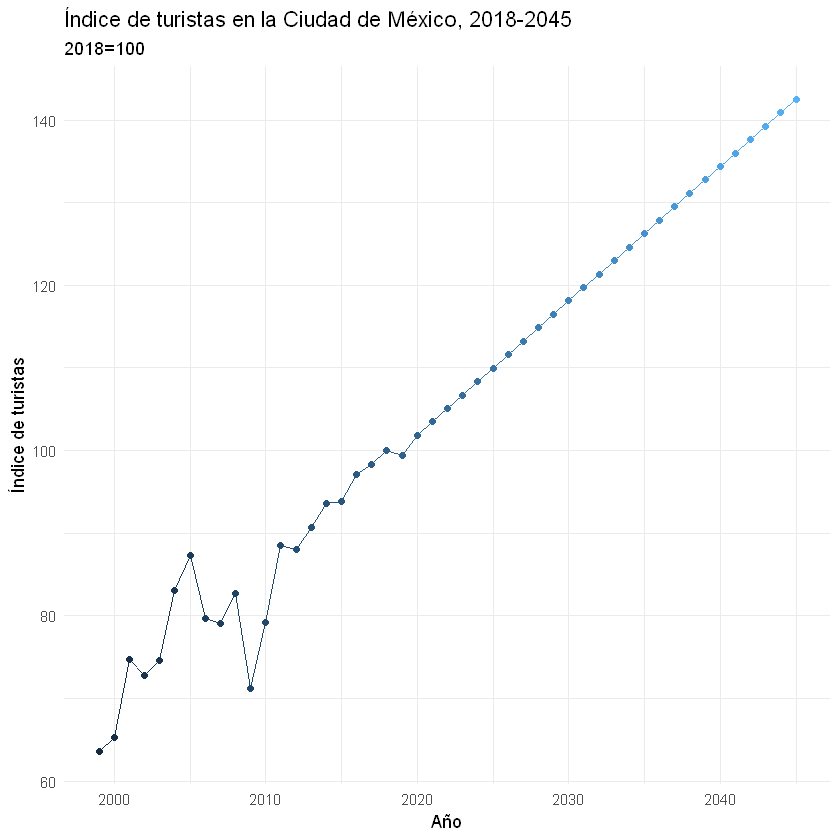

In [8]:
# Plotear índice de turistas
turistas_extended%>%
ggplot(aes(x=anio, y=turistas_index, color=anio))+
geom_line()+geom_point()+
labs(title="Índice de turistas en la Ciudad de México, 2018-2045",x="Año",y="Índice de turistas",
subtitle="2018=100")+
theme_minimal()+
theme(legend.position = "none")

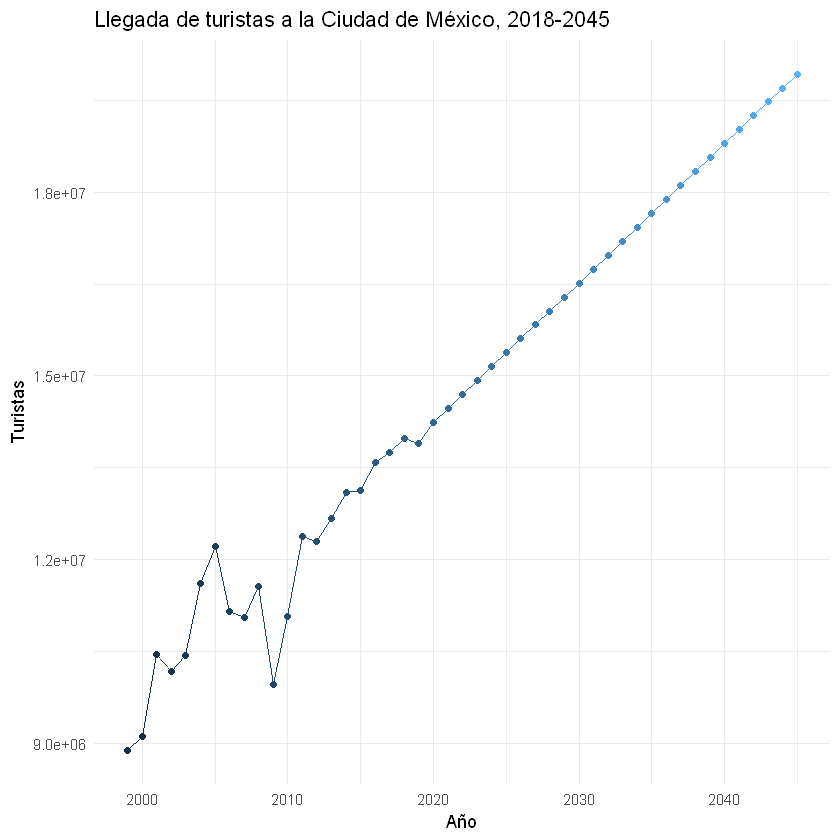

In [9]:
# Plotear turistas
turistas_extended%>%
ggplot(aes(x=anio, y=turistas, color=anio))+
geom_line()+geom_point()+
labs(title="Llegada de turistas a la Ciudad de México, 2018-2045",x="Año",y="Turistas")+
theme_minimal()+
theme(legend.position = "none")

In [10]:
## Mostrar valores 2030, 2035 y 2045
turistas_extended%>%
filter(anio %in% c(2030,2035,2045))%>%
select(anio,turistas_index)


anio,turistas_index
<dbl>,<dbl>
2030,118.1085
2035,126.2399
2045,142.5027


### Relación turista internacional por turista nacional

In [11]:
##Calcular turista internacional por cada turista nacional
turnal<-read_csv(url_tur,show_col_types = FALSE)%>%filter(anio<=2019)%>%
group_by(anio,ambito)%>%
summarise(turistas=sum(turistas))%>%
pivot_wider(names_from = "ambito", values_from = "turistas")%>%
janitor::clean_names()%>%
#Calcular turista internacional por cada turista nacional
mutate(turintnal=internacionales/nacionales)

turnal


`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.


anio,internacionales,nacionales,turintnal
<dbl>,<dbl>,<dbl>,<dbl>
1998,1960885,5929843,0.3306808
1999,1993834,6899253,0.2889927
2000,2098581,7025414,0.2987128
2001,2505806,7946130,0.3153492
2002,2311649,7859183,0.2941335
2003,2595500,7842537,0.3309516
2004,2811310,8804025,0.3193210
2005,3279097,8933568,0.3670535
2006,2822909,8326252,0.3390372


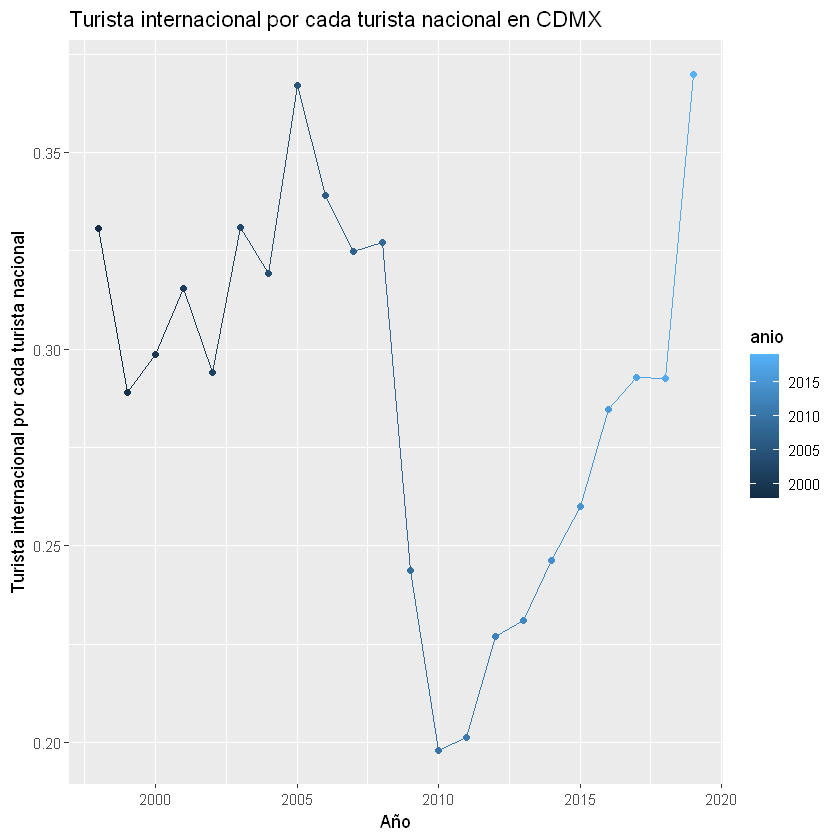

In [12]:
##Graficar turista internacional por cada turista nacional
turnal%>%
ggplot(aes(x=anio, y=turintnal, color=anio))+
geom_line()+geom_point()+
labs(title="Turista internacional por cada turista nacional en CDMX",x="Año",y="Turista internacional por cada turista nacional")

## Indicador de empleo turístico
La primera aproximación será utilizando el sector Restaurantes y servicios de alojamiento. Esto puede representar una sobreestimación del empleo turístico, ya que los restaurantes son actividades conexas al turismo.

In [13]:
url_trabajo<-"https://www.stps.gob.mx/gobmx/estadisticas/ENOE_TRIM15_2020/df.xls"
#Crear carpeta data
dir.create("data",showWarnings = FALSE)

In [14]:
##Descargar archivo
GET(url_trabajo, write_disk("data/trabajo.xls",overwrite = TRUE), config = config(ssl_verifypeer = FALSE))

Response [https://www.stps.gob.mx/gobmx/estadisticas/ENOE_TRIM15_2020/df.xls]
  Date: 2025-02-09 04:31
  Status: 200
  Content-Type: application/vnd.ms-excel
  Size: 554 kB
<ON DISK>  C:\Users\claud\Documents\GitHub\pgd_cdmx\indicadores\turismo\data\trabajo.xlsNULL

In [15]:
##Leer archivo
trabajo<-readxl::read_xls("data/trabajo.xls",sheet=1, skip=5, col_names = FALSE)%>%
rename(concepto=1)%>%
#Filtrar si concepto contiene Población ocupada o Restaurantes
filter(grepl("Ocupada|Restaurantes",concepto))%>%
#seleccioanr primeros dos renglones
slice(1:2)
trabajo

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

concepto,...2,...3,...4,...5,...6,...7,...8,...9,...10,⋯,...63,...64,...65,...66,...67,...68,...69,...70,...71,...72
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ocupada,3944569,3882601,3924236,3964657,3949209,3992661,3904975,3845065,3896719,⋯,4534376,4546515,4698174,4693298,4709095,4712506,4657701,4715069,4834239,4894634
Restaurantes y servicios de alojamiento,265813,232611,252652,259892,260925,277272,264525,273183,281031,⋯,402309,360642,381627,343656,352408,379942,381154,350950,411774,415820


In [16]:
# Generar nombre de columnas 2 hacia adelante
start_year <- 2007
start_quarter <- 1

trabajo <- readxl::read_xls("data/trabajo.xls",sheet=1, skip=5, col_names = FALSE)%>%
    rename(concepto = 1) %>%
#Filtrar si concepto contiene Población ocupada o Restaurantes
  filter(grepl("Ocupada|Restaurantes", concepto)) %>%
  slice(1:2) %>%
  #Generar nombre de columnas 2 hacia adelante

  {
    num_quarters <- ncol(.) - 1
    quarter_names <- sapply(0:(num_quarters - 1), function(i) {
      year <- start_year + (start_quarter + i - 1) %/% 4
      quarter <- (start_quarter + i - 1) %% 4 + 1
      paste0(year, " Q", quarter)
    })
    setNames(., c("concepto", quarter_names))
  }%>%
  mutate(across(-concepto, as.numeric))%>%
    pivot_longer(cols = -concepto, names_to = "quarter", values_to = "value")%>%
    #Filtrar si quarter contiene Q4
    filter(grepl("Q4",quarter))%>%
    #Crear año
    mutate(year=as.numeric(str_extract(quarter,"\\d{4}")))%>%
  group_by(year) %>%
  mutate(
    porcentaje_po = value[concepto == "Restaurantes y servicios de alojamiento"] /
      value[concepto == "Ocupada"] * 100
  ) %>%
  ungroup() %>%
  # Select only the desired columns
  select(year, porcentaje_po)


trabajo

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

year,porcentaje_po
<dbl>,<dbl>
2007,6.555220
2008,7.104769
2009,6.871464
2010,6.731017
2011,6.790198
2012,7.634546
2013,7.727865
2014,8.539687
2015,6.883214


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


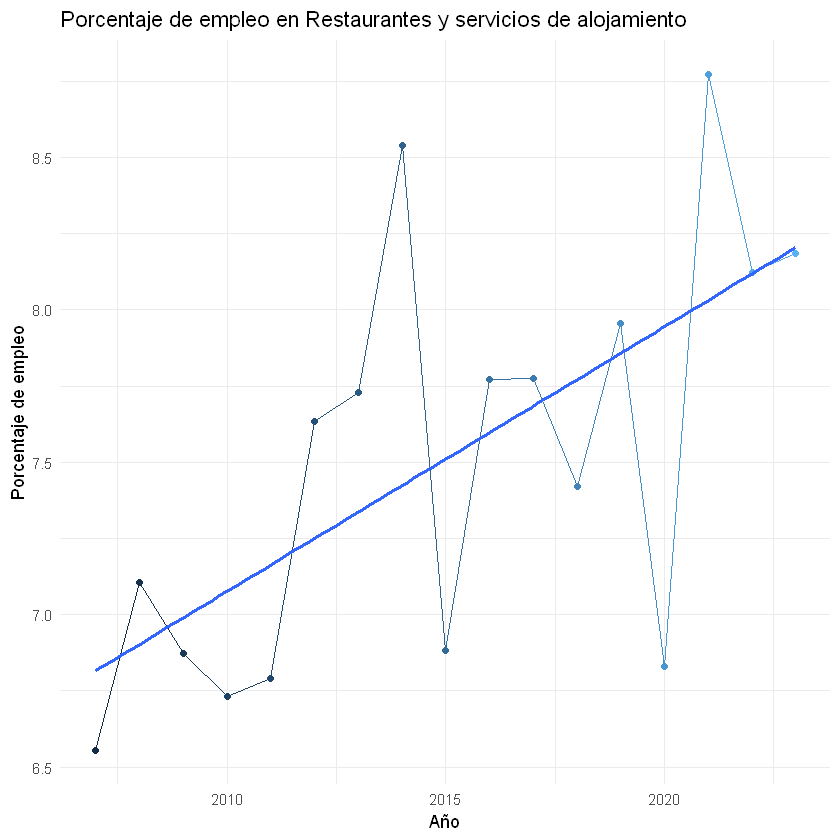

In [17]:
#Graficar
trabajo%>%
ggplot(aes(x=year, y=porcentaje_po, color=year))+
geom_line()+geom_point()+geom_smooth(method="lm",se=FALSE)+
labs(title="Porcentaje de empleo en Restaurantes y servicios de alojamiento",x="Año",y="Porcentaje de empleo")+theme_minimal()+
theme(legend.position = "none")

In [18]:
#Calcular tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019

valor_inicial<-trabajo%>%filter(year==2009)%>%pull(porcentaje_po)
valor_final<-trabajo%>%filter(year==2019)%>%pull(porcentaje_po)
tasa_crecimiento<-((valor_final/valor_inicial)^(1/(2019-2009))-1)*100
print(paste("La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de",round(tasa_crecimiento,2),"%"))

[1] "La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de 1.48 %"
[2] "La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de 1.48 %"


In [19]:
#Aplicar tasa de crecimiento a 2020 a 2045
trabajo_extended<-data.frame(year=2020:2045)
trabajo_extended$porcentaje_po<-valor_final*(1+tasa_crecimiento/100)^((2020:2045)-2019)
trabajo_extended

year,porcentaje_po
<int>,<dbl>
2020,8.074180
2021,8.193445
2022,8.314471
2023,8.437286
2024,8.561914
2025,8.688383
2026,8.816720
2027,8.946953
2028,9.079110


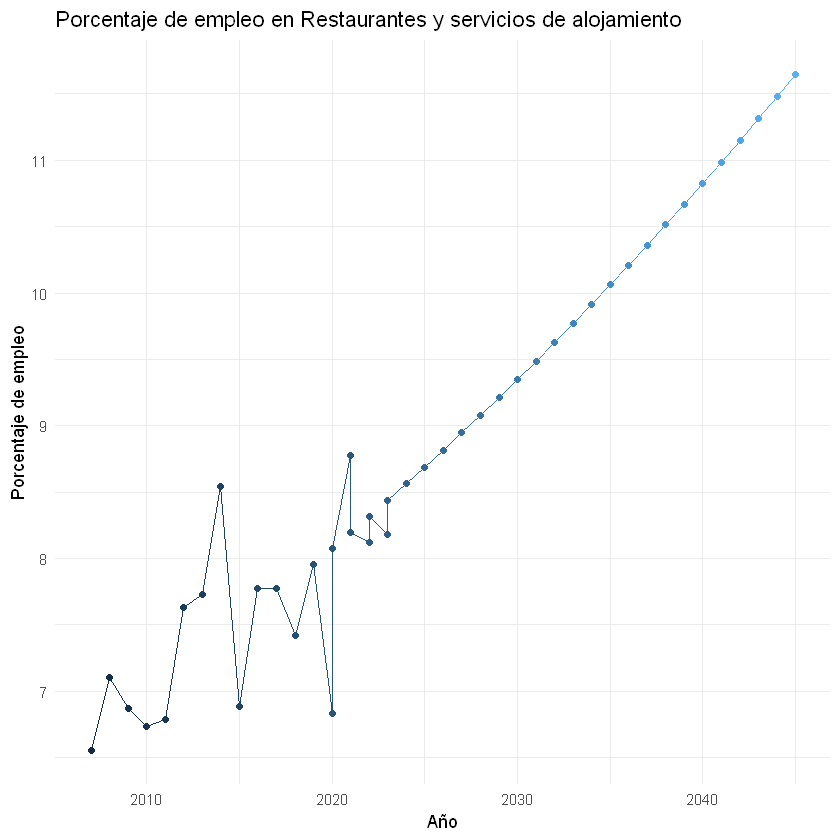

In [20]:
#Pegar datos
trabajos_final<-bind_rows(trabajo,trabajo_extended)
#Graficar
trabajos_final%>%
ggplot(aes(x=year, y=porcentaje_po, color=year))+
geom_line()+geom_point()+
labs(title="Porcentaje de empleo en Restaurantes y servicios de alojamiento",x="Año",y="Porcentaje de empleo")+theme_minimal()+
theme(legend.position = "none")


In [21]:
#Sacar valores 2030, 2035 y 2045
trabajos_final%>%
filter(year %in% c(2030,2035,2045))%>%
select(year,porcentaje_po)

year,porcentaje_po
<dbl>,<dbl>
2030,9.349308
2035,10.060510
2045,11.649332


La segunda aproximación será considerando microdatos de ENOE y únicamente la actividad de servicios de alojamiento temporal.

In [22]:
url<-"https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_2023_trim4_csv.zip"


# Descargar el archivo y descomprimirlo
options(timeout = 9999999)
destfile <- "data/conjunto_de_datos_enoe_2023_4t_csv.zip"
download.file(url, destfile = destfile)
unzip(destfile, exdir = "data")

In [23]:
#Leer tabla y filtrar ocupados

ocupados<-read_csv("data/ENOE_SDEMT423.csv", show_col_types = FALSE)%>%
janitor::clean_names()%>%
filter(
       clase2==1,
       ((eda>=15 & eda<=98 & !is.na(eda)) &
                                     (c_res==1 | c_res==3)))
nrow(ocupados)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


[1] 192399

In [24]:
#Traer clasificación SINCO

scian<-read_csv("data/ENOE_COE1T423.csv", show_col_types = FALSE)%>%janitor::clean_names()%>%
select(tipo, mes_cal,cd_a,ent,con,v_sel,n_hog,h_mud, n_ren,p4a)%>%
#Renombrar p4a a scian_4
rename(scian_4 = p4a)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


In [25]:
ocupados<-left_join(ocupados, scian, by = c("tipo", "mes_cal", "cd_a", "ent", "con", "v_sel", "n_hog", "h_mud", "n_ren"))%>%
#Obtener ocupados en servicios de alojamiento temporal
mutate(turismo=case_when(scian_4 %in% c(7210) ~ 1,
            TRUE ~ 0))
nrow(ocupados)

[1] 192399

In [39]:
##unique scian_4 si scian es 18
print("Subsectores de Restaurantes y servicios de alojamiento")
ocupados%>%
filter(scian %in% c(18))%>%
select(scian_4)%>%
unique()

[1] "Subsectores de Restaurantes y servicios de alojamiento"


scian_4
<dbl>
7221
7210
7222
7223


In [26]:
options(survey.lonely.psu="certainty")
dm<-ocupados%>%
as_survey_design(ids = upm,
                 strata = est_d_tri,
                 weights = fac_tri,
                    nest = TRUE)

In [44]:
print("Población ocupada en turismo por entidad federativa")
dm%>%
filter(turismo==1)%>%
  mutate(nom_ent=case_when(ent==1 ~ "Aguascalientes",
                           ent==2 ~ "Baja California",
                           ent==3 ~ "Baja California Sur",
                           ent==4 ~ "Campeche",
                           ent==5 ~ "Coahuila de Zaragoza",
                           ent==6 ~ "Colima",
                           ent==7 ~ "Chiapas",
                           ent==8 ~ "Chihuahua",
                           ent==9 ~ "Ciudad de México",
                           ent==10 ~ "Durango",
                           ent==11 ~ "Guanajuato",
                           ent==12 ~ "Guerrero",
                           ent==13 ~ "Hidalgo",
                           ent==14 ~ "Jalisco",
                           ent==15 ~ "México",
                           ent==16 ~ "Michoacán de Ocampo",
                           ent==17 ~ "Morelos",
                           ent==18 ~ "Nayarit",
                           ent==19 ~ "Nuevo León",
                           ent==20 ~ "Oaxaca",
                           ent==21 ~ "Puebla",
                           ent==22 ~ "Querétaro",
                           ent==23 ~ "Quintana Roo",
                           ent==24 ~ "San Luis Potosí",
                           ent==25 ~ "Sinaloa",
                           ent==26 ~ "Sonora",
                           ent==27 ~ "Tabasco",
                           ent==28 ~ "Tamaulipas",
                           ent==29 ~ "Tlaxcala",
                           ent==30 ~ "Veracruz de Ignacio de la Llave",
                           ent==31 ~ "Yucatán",
                           ent==32 ~ "Zacatecas"))%>%
                             group_by(nom_ent)%>%
summarise(ocupados = survey_total(vartype = "cv"),
porcentaje = survey_prop(vartype = "cv"))%>%
mutate(porcentaje = porcentaje*100)%>%
arrange(desc(porcentaje))%>%
janitor::adorn_totals("row")

[1] "Población ocupada en turismo por entidad federativa"


nom_ent,ocupados,ocupados_cv,porcentaje,porcentaje_cv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Quintana Roo,137606,0.05668803,27.5088210,0.0557282
Jalisco,43947,0.17269958,8.7854465,0.1620022
Baja California Sur,43203,0.10706990,8.6367135,0.1055645
Veracruz de Ignacio de la Llave,28626,0.29975641,5.7226248,0.2850088
Nayarit,27567,0.17335917,5.5109201,0.1685262
Guerrero,27409,0.24177879,5.4793343,0.2317563
Ciudad de México,24473,0.22338291,4.8923984,0.2160496
Guanajuato,14325,0.27357605,2.8637113,0.2687328
México,12572,0.37553441,2.5132690,0.3682356


In [37]:
#Población ocupada en cultura en la Ciudad de México

print("Población ocupada en turismo en la Ciudad de México")
dm%>%
  filter(ent==9)%>%
  group_by(turismo)%>%
    summarise(ocupados = survey_total(vartype = "cv"),
                porcentaje = survey_prop(vartype = "cv"))%>%
  mutate(porcentaje = porcentaje*100)%>%
    janitor::adorn_totals("row")

[1] "Población ocupada en turismo en la Ciudad de México"


turismo,ocupados,ocupados_cv,porcentaje,porcentaje_cv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,4633228,0.01752721,99.4745691,0.001178609
1,24473,0.22338291,0.5254309,0.223134214
Total,4657701,0.24091012,100.0000000,0.224312823
